<a href="https://colab.research.google.com/github/Pv01energ/pv01/blob/main/'PavlovP_'WDBC''.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Здравствуйте!
  В этой задаче (классификации) Мы должны предсказать наличие (или отсутствие) онкологии молочной железы: 'M' (злокачественная) или 'B' (доброкачественная), используя методы машинного обучения (ML). 
  Используемый Датасет: "Набор данных о раке молочной железы в Висконсине (диагностический)", ссылка (на Датасет): https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data , (на Репозиторий): https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data ) 



# Загрузка данных

In [ ]:
# импортируем необходимые библиотеки 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# загружаем датасет (data)
from google.colab import files 
uploaded = files.upload()
dt = pd.read_csv('data.csv')

Saving data.csv to data (1).csv


In [ ]:
# подключение к среде Colab
from google.colab import drive
drive.mount('/content/drive')

# Описание датасета

In [ ]:
# извлекаем интересующую нас информацию из описания Датасета
from sklearn import datasets
data=datasets.load_breast_cancer()
print(data.keys())

In [ ]:
# Анотация к Датасету
print(data.DESCR)  

О наборе данных (перевод):

Характеристики вычисляются по оцифрованному изображению аспирата тонкой иглы (FNA) массы молочной железы. Они описывают характеристики ядер клеток, присутствующих на изображении.
n трехмерное пространство - это то, что описано в: [К. П. Беннетт и О. Л. Мангасарян: "Надежная линейная программная дискриминация двух линейно неотделимых множеств", Методы оптимизации и программное обеспечение 1, 1992, 23-34].

Эта база данных также доступна через ftp-сервер UW CS:
ftp ftp.cs.wisc.edu
cd math-prog / cpo-dataset / машинное обучение /WDBC/
Также можно найти в репозитории машинного обучения UCI: https://archive.ics.uci.edu/ml/datasets/Breast/canser 

Атрибутивная информация:

а) ИДЕНТИФИКАЦИОННЫЙ номер

б) Диагноз (M = злокачественный, B = доброкачественный)
3-32)

Для каждого клеточного ядра вычисляются 10 (Десять) признаков (вещественных):

1) радиус (среднее расстояние от центра до точек по периметру)

2) текстура (стандартное отклонение значений шкалы серого)

3) периметр

4) площадь

5) гладкость (локальное изменение длины радиуса)

6) компактность (периметр ^ 2 / площадь - 1,0)

7) вогнутость (серьезностьвогнутых участков контура)

8) вогнутые точки (количество вогнутых участков контура)

9) симметрия

10) фрактальная размерность ("приближение береговой линии" - 1)

Среднее значение, стандартная ошибка и "худшее" или наибольшее (среднее из трех
наибольших значений) этих признаков были вычислены для каждого изображения,
в результате чего получилось 30 признаков. 
Например: поле 3 - это средний радиус, поле 13 - это радиус SE, поле 23 - наихудший радиус.

Все значения признаков перекодируются с четырьмя значащими цифрами.

Отсутствующие значения атрибутов: отсутствуют.

Распределение по классам: 357 доброкачественных (В), 212 злокачественных (М)


In [ ]:
# проверяем загрузку данных (первые 5 строк таблицы)
dt.head()

# EDA (разведочный анализ) 

In [ ]:
# Категории параметров (строковые/числовые)
dt.info()

In [ ]:
# проверяем нулевые значечения. NaN, NAN, na
dt.isna().sum()

In [ ]:
# удаляем параметры 'id'и'Unnamed: 32'из таблицы 
#dt = dt.drop(columns=['id', 'Unnamed: 32'], axis=1)

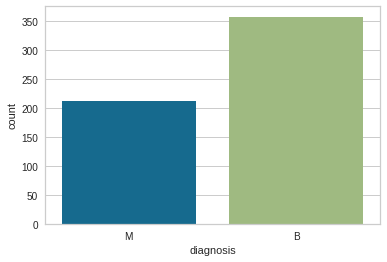

In [ ]:
# строим диаграмму целевой переменной 
sns.countplot(dt['diagnosis'], label='count')

In [ ]:
# кодируем категориальные значений данных
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
dt.iloc[:,1] = labelencoder_y.fit_transform(dt.iloc[:,1].values)

In [ ]:
# строим тепловую карту кореляции основных признаков (10)
plt.figure(figsize=(10,10))
sns.heatmap(dt.iloc[:,1:12].corr(), annot=True, fmt='.0%')

In [ ]:
# выделим целевую переменную y (target) 
X = dt.iloc[:,2:31].values
y = dt.iloc[:,1].values

type(X)

In [ ]:
# делим набор данных на  обучающие (80%) и тестовые (20%)  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [ ]:
# предварительная обработка импорта StandardScaler, масштабируем данные (объектов)из sklearn. 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Sclearn: Логистическая регрессия (logistic regression), Дерево решений (decision tree), Cлучайный лес (random forest classifier)

In [ ]:
# функция для построения моделей (на основании обучающих данных)
def models(X_train, y_train):

  # Логистическая регрессия (logistic regression)
  from sklearn.linear_model import LogisticRegression
  logr = LogisticRegression(random_state=0)
  logr.fit(X_train, y_train)

  # Дерево решений (decision tree)
  from sklearn.tree import DecisionTreeClassifier
  dtree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  dtree.fit(X_train, y_train)

  # Случайный лес (random forest classifier)
  from sklearn.ensemble import RandomForestClassifier
  rforest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  rforest.fit(X_train, y_train)

  # точность моделей на основе обучающих данных
  print('[0]Logistic Regression Training Accutacy:', logr.score(X_train, y_train))
  print('[1]Logistic Decision Tree Classifier Training Accuracy:', dtree.score(X_train, y_train))
  print('[2]Random Forest Classifier Accutacy:', rforest.score(X_train, y_train))

  return logr, dtree, rforest

In [ ]:
#Выводим результаты обучения моделей (train)
model = models(X_train, y_train)

In [ ]:
# проверка точности моделей (на тестовых данных) с использованием матрицы ошибок
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print('Model ', i)
  cm = confusion_matrix(y_test, model[i].predict(X_test))

# истинные положительные результаты, ложноположительные результаты, ложноотрицательные результаты и истинные отрицательные результаты соответственно
  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing Accuracy = ', (TP+TN)/(TP+TN+FN+FP))
  print()

In [ ]:
# строим таблицу для сравнения результатов ML Sclearn
from prettytable import PrettyTable
    
X = PrettyTable()

X.title = 'Результат тестирования моделей: '
X.field_names = ["Название модели Sclearn", "Tочность обучения", "Tочность тестирования"]

X.add_row(["Logistic Regression (LR)", "99.12 %","96.491228 %"])
X.add_row(["Logistic Decision Tree Classifier", "100 %","93.859649 %"])
X.add_row(["Random Forest Classfier (RFC)", "99.78 %","97.368421 %"])

print(X)

Лучший результат по точности тестирования (Testing Accuracy) показала модель - Cлучайный лес (Random forest classifier) RFC: 0.97368421 (или 97,368421 %)

# PyCaret

In [ ]:
# устанавливаем среду PyCaret (после перезапуска среды исполняем код, начиная с этой команды)
!pip install --pre pycaret

In [ ]:
# подключаемся к датасету (после исполнения этой команды среду не перезапускать!)
from pycaret.datasets import get_data
data = get_data('data')

In [ ]:
# выбираем  целевую переменную
from pycaret.classification import *
s = setup(data,target = 'diagnosis')

In [ ]:
# выбираем лучшую модель
best = compare_models()

In [ ]:
# строим  график, позволяющий оценить качество классификации
plot_model(best)

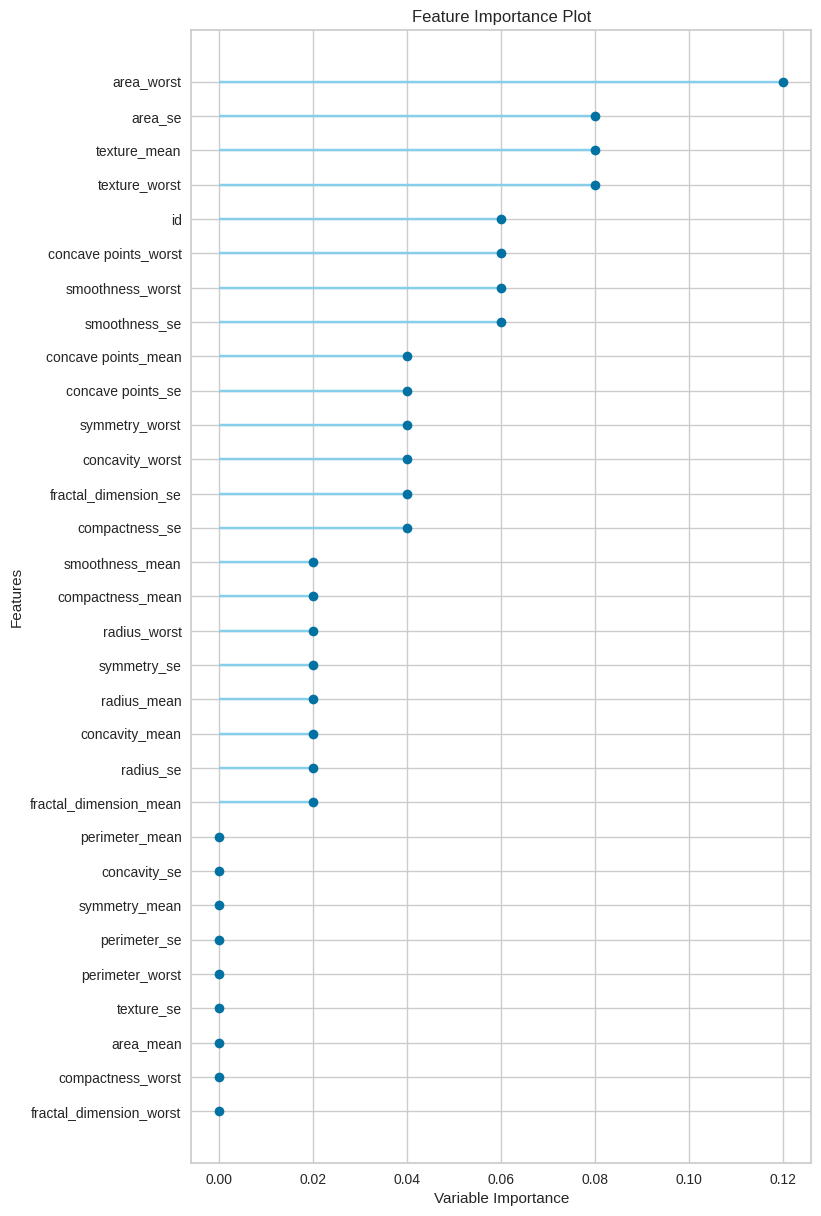

In [ ]:
# Визуализации настроек модели ML (Нужно понажимать на радиокнопочки, например 'Feature Importance' и др.)
evaluate_model(best)

In [ ]:
# выполняем обучение ML
from pycaret.classification import ClassificationExperiment
exp1 = ClassificationExperiment()

In [ ]:
# настройки эксперемента (обучения модели)
exp1.setup(data, target = 'diagnosis')

,Description,Value
0,Session id,7521
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 33)"
5,Transformed data shape,"(569, 32)"
6,Transformed train set shape,"(398, 32)"
7,Transformed test set shape,"(171, 32)"
8,Numeric features,32
9,Rows with missing values,100.0%


In [ ]:
#  таблица параметров  учавствующих в обучении модели (ML)
dir(exp1)

In [ ]:
# выводим результаты Эксперемента (обучения)
exp1.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9549,0.9895,0.9195,0.9614,0.9382,0.9028,0.9054,0.2780
lightgbm,Light Gradient Boosting Machine,0.9549,0.9842,0.9062,0.9737,0.9357,0.9014,0.9058,0.1320
ridge,Ridge Classifier,0.9548,0.0000,0.8852,0.9938,0.9337,0.8999,0.9060,0.0410
ada,Ada Boost Classifier,0.9548,0.9869,0.9190,0.9599,0.9370,0.9019,0.9046,0.1670
rf,Random Forest Classifier,0.9524,0.9866,0.9195,0.9532,0.9344,0.8971,0.8993,0.3270
lda,Linear Discriminant Analysis,0.9524,0.9893,0.8790,0.9938,0.9300,0.8945,0.9012,0.0520
qda,Quadratic Discriminant Analysis,0.9523,0.9881,0.9390,0.9383,0.9357,0.8979,0.9014,0.0510
gbc,Gradient Boosting Classifier,0.9500,0.9845,0.9200,0.9482,0.9315,0.8923,0.8952,0.3060
dt,Decision Tree Classifier,0.8996,0.8955,0.8790,0.8613,0.8679,0.7871,0.7897,0.0550
knn,K Neighbors Classifier,0.7285,0.7483,0.4319,0.7101,0.5333,0.3629,0.3845,0.1460


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=2857, verbose=0, warm_start=False)

Лучший результат в PyCaret (по точности тестирования) показал ансамбль - Классификатор случайных деревьев (et) Extra trees classifier): ~ 0.9749* (или 97,49%).

! * При каждом пересчёте (последующих обучениях) одного и того же набора данных  (Датасета),  при неизменных (одних и тех же) входных параметрах, выходные показатели будут (незначительно) меняться, т.к.  выборка (на обучающую и тестовую) делится (выбираются данные) автоматически, случайным образом (числом)!

# Выводы (заключения)



В данном блокноте (Colab), Мы:

1)	 Выбрали Датасет (на ресурсе Kagll.com), определили Задачу (бинарной классификации) и установили цель (target: ‘diagnosis’)  или Диагноз.  В этой задаче (классификации) Мы должны предсказать наличие (или отсутствие) онкологии молочной железы: M (злокачественная) или B (доброкачественная), используя методы машинного обучения (ML). 

 Исследование проводили на (реальном) наборе  Данных: "Набор данных о раке молочной железы в Висконсине (диагностический)", ссылка (на Датасет): https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data , (на Репозиторий): https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data. 

Загрузив в блокнот данный Датасет, проанализировали Данные и подготовили их для целей машинного обучения (ML). 

2)	 Выбрали и обучили (подходящие для  цели классификации)  модели (ML) в средах  (и с  использованием  библиотек) Sclearn (Логистическая (линейная) регрессия, Деревья  решений и Случайный лес), PyCaret  (Ансамблевым методом из 15-ти алгоритмов машинного обучения).

3)	Сравнили результаты экспериментов полученных в результате обучения (и тестирования) выбранных нами алгоритмов (ML) и выявили лучший из них. 
Им оказался алгоритм в Ансамбля среды PyCaret: ‘Классификатор случайных деревьев’ (et) ‘Extra trees classifier’) c результатом ~ 0.9749* (или 97,49%) по точности тестирования (Testing Accuracy).

[! * При каждом пересчёте (последующих обучениях) одного и того же набора данных (Датасета), при неизменных (одних и тех же) входных параметрах, выходные показатели будут (незначительно) меняться, т.к. выборка (на обучающую и тестовую) делится (выбираются данные) автоматически, случайным образом (числом)!]

Следом за ним идёт Алгоритм библиотеки Sclern : Cлучайный лес (Random forest classifier) RFC: ~ 0.97368421 (или 97,368421 %) по точности тестирования.

4) Если сравнить оба данных метода (алгоритма), то основное различие между алгоритмом Random forest и Extra tree заключается в следующем:

а) Случайный лес использует подготовленные (загрузочные) выборки (обучающую и тестовую) , он выполняет подвыборку (входных) данных с заменой, тогда как ‘Классификатор случайных деревьев’ (et) ‘Extra trees classifier’) использует весь исходный набор данных (неразделённый датасет).

б) Другим отличием является выбор точек разделения выборки (на обучающую и тестовую), для разделения данных Random Forest выбирает оптимальное разделение, а Extra Trees выбирает его случайным образом. 
Однако после выбора точи разделения на две подвыборки, сам определяет лучшие из всех подмножеств признаков. Поэтому Extra Trees добавляет рандомизацию (но все еще имеет оптимизацию).

Преимущества алгоритма ‘Классификатор случайных деревьев’ (et) ‘Extra trees classifier’ вероятно в том, что он (et)  использует весь исходный Датасет вместо разделённой для обучения выборки, уменьшая погрешность.
Кроме того он является высокорандомизированный алгоритмом и случайным образом выбирает точку разделения данных (на обучающие и тестовые), что снижает дисперсию.

Он (намного) быстрее алгоритмов: «Дерева решений» и «Случайного леса», поскольку не тратит время на выбор оптимальной точки разделения входных параметров.
Поскольку данный  алгоритм (‘Классификатор случайных деревьев’ (et) ‘Extra trees classifier’)  уменьшает систематическую ошибку, т.е. вероятность того, что модель (ML) будет переобучена (или недообучена) значительно снижается.

Благодарю за внимание!


#P.S. 

Анимация: Градиентный спуск 

gradient_descent.gif

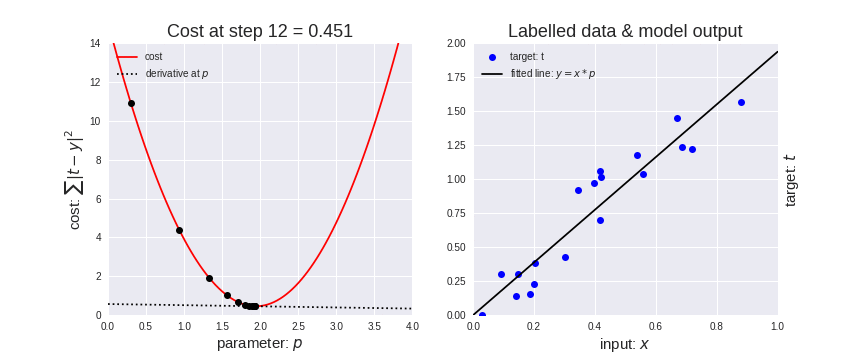

Спасибо!